<a href="https://colab.research.google.com/github/mahidhiman12/Deep_learning_with_PyTorch/blob/main/5_PyTorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a computer vision problem?

- Computer vision aims to give machines the ability to process and understand visual information from the world, just as humans do. This involves extracting meaningful information from images and videos, such as recognizing objects, understanding their relationships, and making decisions based on that understanding

- This involves tasks like object detection, image classification, image segmentation and scene understanding, often requiring complex algorithms and substantial datasets to achieve human-level performance

- Take a look at apple's machine learning research or tesla computer vision

- Essentially , anything you're able to see , you can potentially turn into a computer vision problem

## Inputs and Outputs of computer vision
Let's start with a multi-class classification problem:
  - So we wanted to take photos of different images of food and recognize what they were

  - We might start with a bunch of food images that have a height and width of some sort : eg - width = 224 , height = 224 , color channels = 3 (red , green , blue)

  - In computer vision, images are represented as numerical matrices, where each element in the matrix corresponds to a pixel's color or intensity value. For color images, this usually involves three matrices, one each for the red, green, and blue (RGB) color channels. Each value within these matrices represents the intensity of that color at a specific pixel location

  - We might numerically encode these , in other words , represent our images as a tensor , and this will be inputs to a machine learning algorithm

  - And in many cases , depending on what problem you're working on , an exiisting algorithm already exists for many of the most popular computer vision problems

  - And then you might fashion this machine learning algorithm to output the exact shapes you want

  - Our output will be predicted probabilities , the highest probability is more likely to be the answer according to the algorithm .

  - Eg:  We gave our model a picture of some food -> it will be converted into a numerical encoding first for example : [0.31 , 0.62 , 0.44] and the model will return outputs like : [0.97 , 0.0 , 0.03] where the first class is sushi , second is pizza , and third is burger so the highest value is first class hence we can say the picture was of a sushi

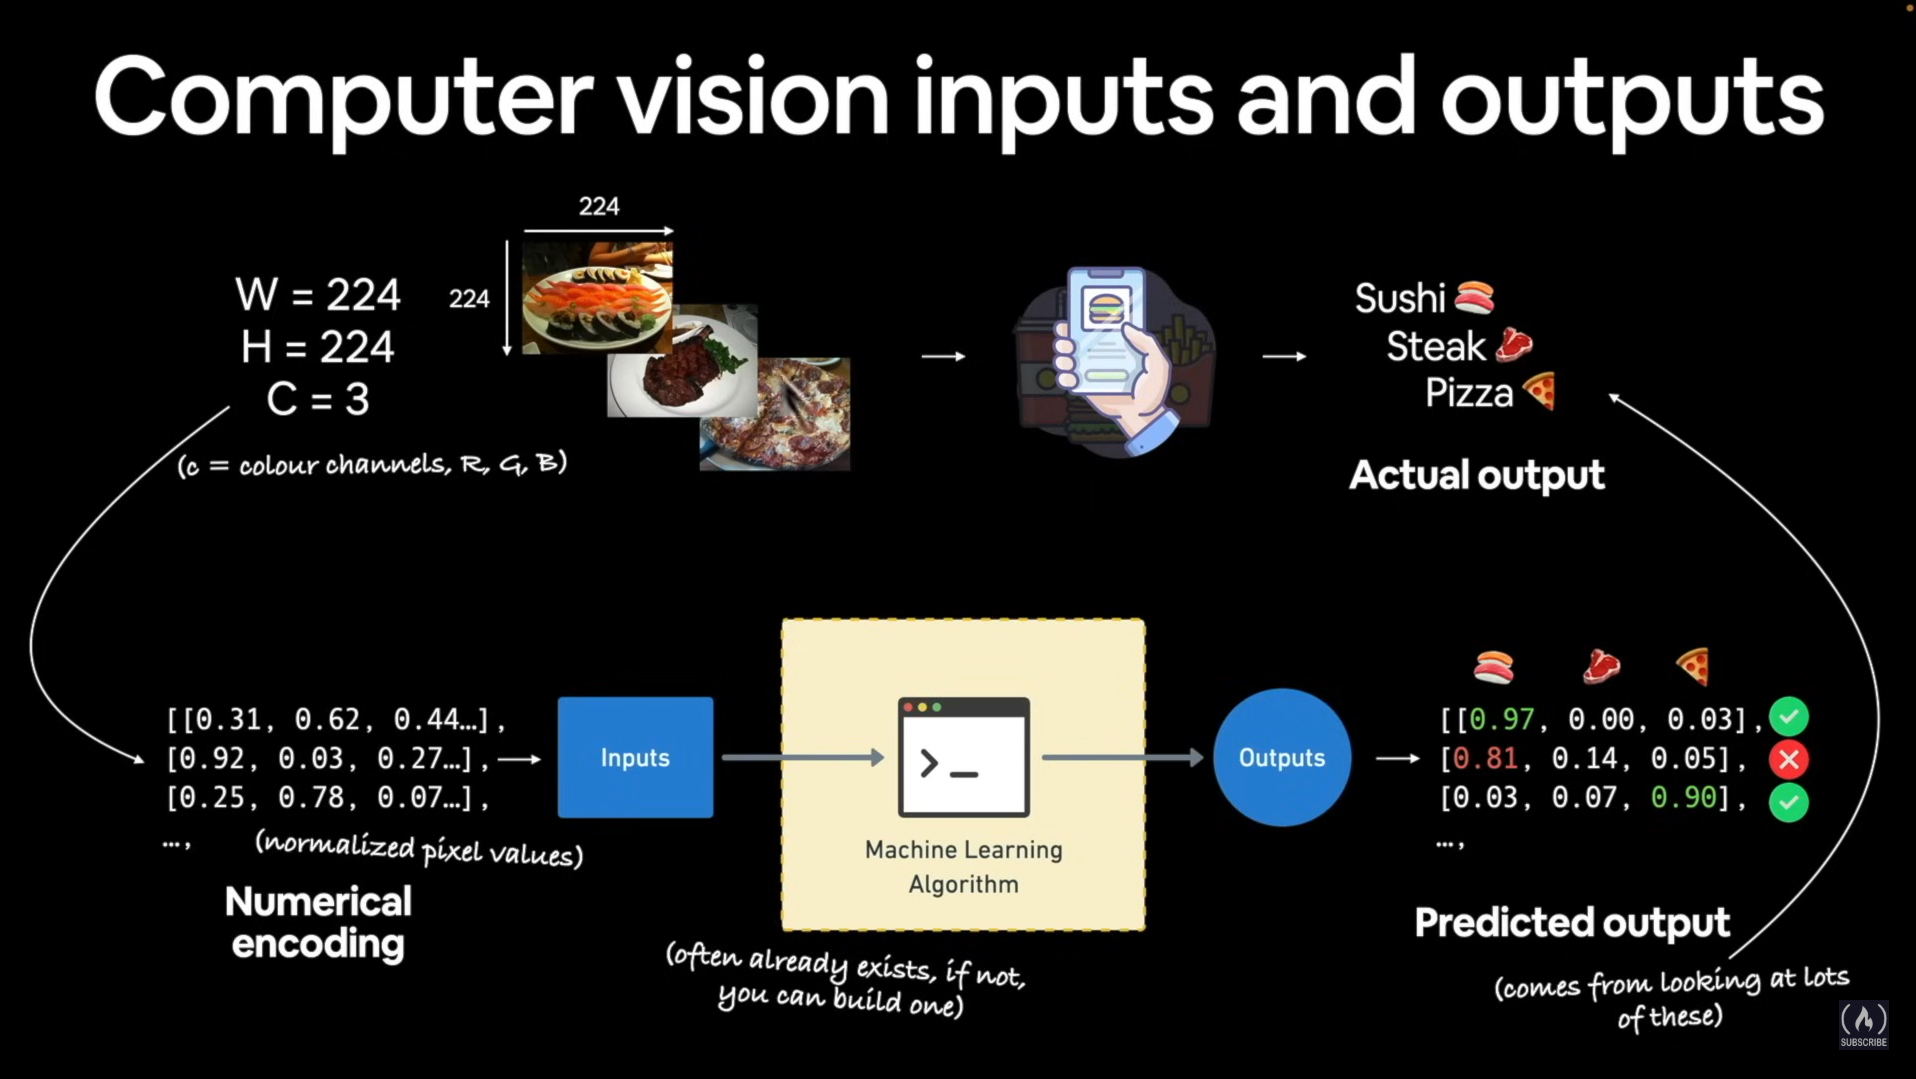

- The model that does this is often a **convolutional neural network (CNN)**

- You can use any other algo for this , but CNNs perform best with image data

- Although , there is the transformer architecture or deep learning model that also performs best with image data

An image can be represented as:

[batch_size , width , height , color_channels] (NHWC)

or

[batch_size , color_channels , height ,  width] (NCHW)

eg: [32 , 224 , 224 , 3]

or

 [32,3,224,224]

## What is a CNN?

- A convolutional neural network (CNN) is a type of artificial neural network that excels at processing grid-like data, particularly images. CNNs are used in various applications, including image recognition, natural language processing, and speech recognition. They are characterized by their use of convolutional layers, which employ filters to extract features from the input data, and pooling layers for dimensionality reduction

- Convolutional Layers:
These layers apply filters to the input data to detect features like edges, textures, or shapes. The filters slide across the input, performing convolution operations to produce feature maps

- Pooling Layers:
These layers reduce the spatial dimensions of the feature maps, which helps to reduce computational complexity and prevent overfitting. Common pooling operations include max pooling and average pooling

- Fully Connected Layers:
These layers, typically found at the end of the CNN, take the output from the convolutional and pooling layers and perform classification or regression tasks.

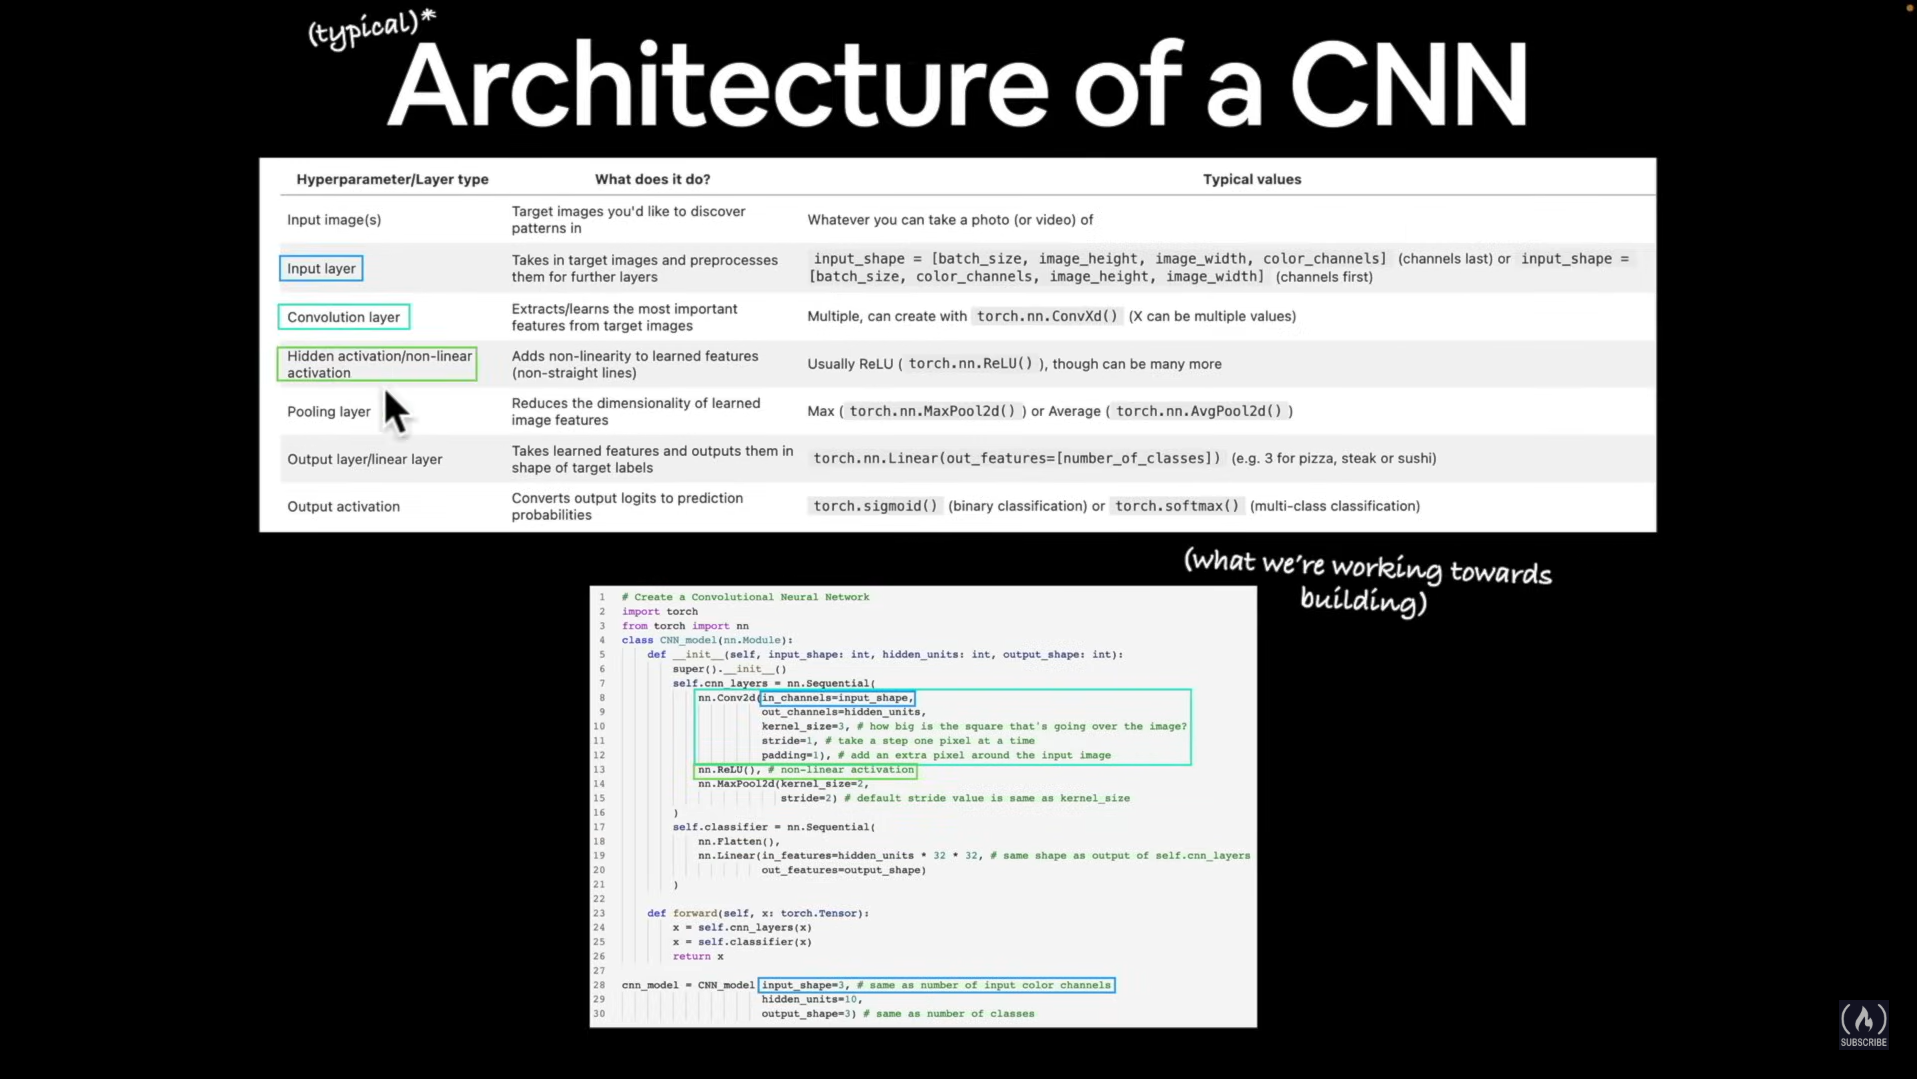

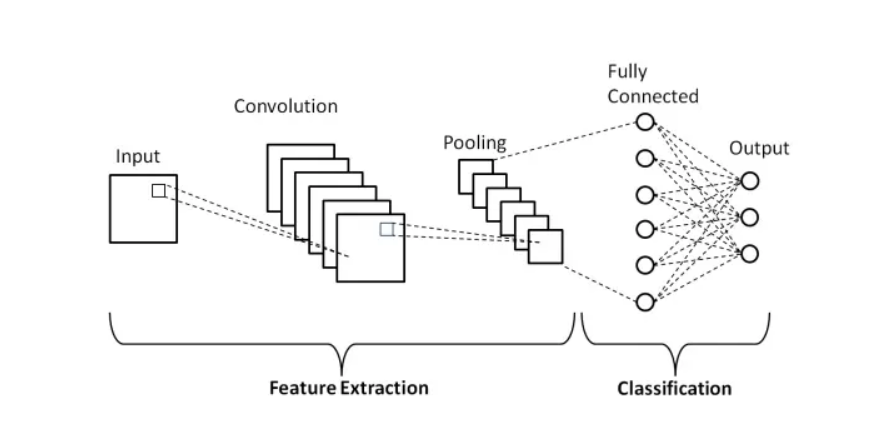

## Computer vision libraries

- `torchvision` : base domain library for PyTorch computer vision
- `torchvision.datasets` : get datasets and data loading functions for computer vision
- `torchvision.models` : get pretrained computer vision models
- `torchvision.transforms` : functions for manipulating your vision data (images) to be suitable for use with an ML MODEL
- `torch.utils.data.Dataset` : Base dataset class for PyTorch
- `torch.utils.data.DataLoader` : Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## 1. Getting dataset

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
MNIST is often referred to as the "Hello World" dataset of computer vision due to its common use in introductory machine learning and deep learning tutorials and for benchmarking classification algorithms

MNIST - Modified National Institute of Standards and Technology

- We will use fashion MNIST dataset from torchvision.dataset to start

- Note: A lot of the datasets that you find in torchvision.datasets have been formatted into training dataset and testing dataset already

### Setup training data

- `ToTensor` : Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]

In [2]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = True , # do we want training dataset
    download = True , # do we want to download
    transform = torchvision.transforms.ToTensor() , # how do we transform data?
    target_transform = None # how do we transform the labels/target
)

test_data  = datasets.FashionMNIST(
    root="data",
    train=False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 23.5MB/s]


- Check out files now , data file should be present

In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
# see the first training example -> first image example
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

- We have a bunch of different numbers that's representing our image and a label corresponding to the image

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
print(f""" Image shape: {image.shape} -> [color_channel , height , width] \n Image label : {class_names[label]}""")

 Image shape: torch.Size([1, 28, 28]) -> [color_channel , height , width] 
 Image label : Ankle boot


- We see the image has color channel 1 , thats because the images are black and white
- Greyscale images has only one color channel
- For black , the pixel value is zero
and for white its some other value . So if its one , its going to be pure white

### 1.2 Visualizing our data

Matplotlib expects just height and width for image , not color channels so if we pass in color channels thats going to give an error

Here in greyscale image , we can use `.squeeze()` method to get rid of the singular dimension

- plt.imshow(image) : ([1,28,28]) -> error
- plt.imshow(image.squeeze) : ([28,28]) -> works

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

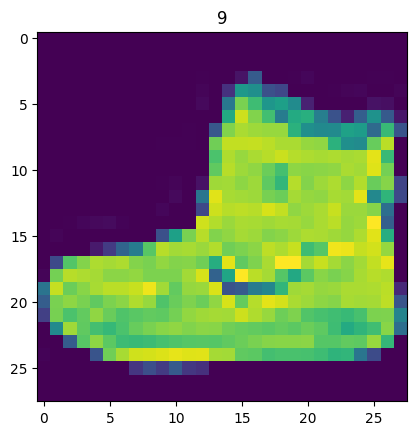

In [8]:
import matplotlib.pyplot as plt
image , label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze());
plt.title(label)

- Image with label 9 is an ankleboot

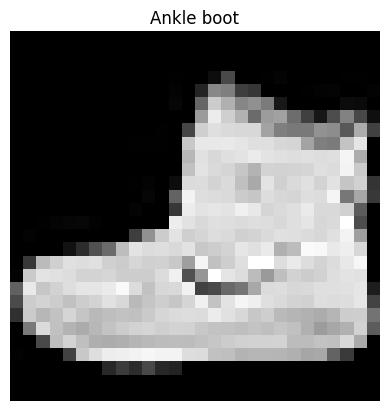

In [9]:
plt.imshow(image.squeeze() , cmap="gray")
plt.title(class_names[label])
plt.axis(False);

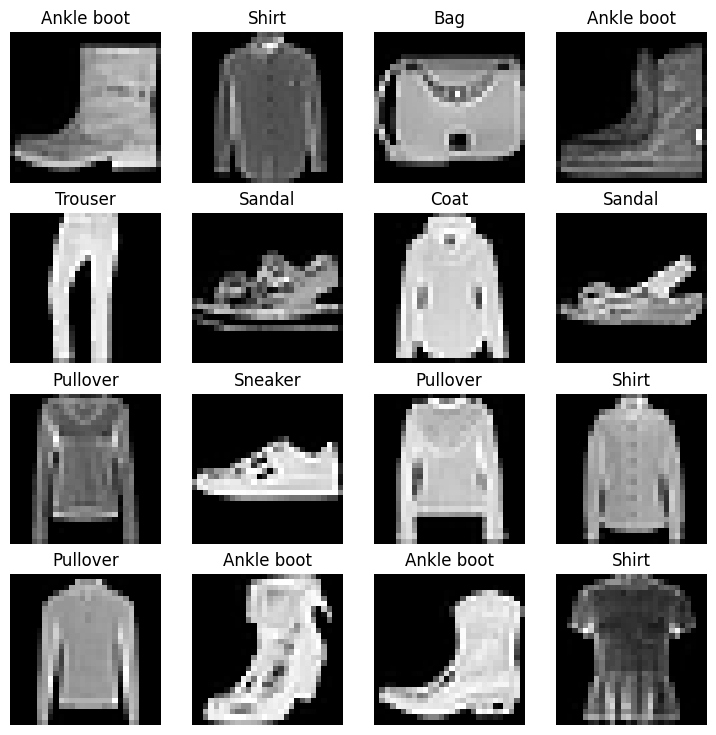

In [10]:
# plot random images
import torch
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
# 16 different random images
rows , cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0 , len(train_data) , size=[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(rows , cols , i)
  plt.imshow(img.squeeze() , cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now , our data is in the form of PyTorch Datasets

DataLoader turns our data into a Python iterable

More specifically , we want to turn our data into batches ( or mini-batches)

Why would we do this?

- Well , we may get away with it by building a model to look at all 60,000 samples of our current dataset , because its quite small , its only comprised of images of 28x28 pixels

- Also , if our computer hardware was able to look at 60,000 samples of 28x28 at one time , it would need a fair bit of memory . But chances are that it might not be able to store millions of images in memory

- So what you do is , you break a dataset from eg: 60,000 into groups of batches or mini-batches

1. It is more computationally efficient , as in , your computing hardware may not be able to look (store in memory) at 60,000 images in one hit. So , we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradients per epoch

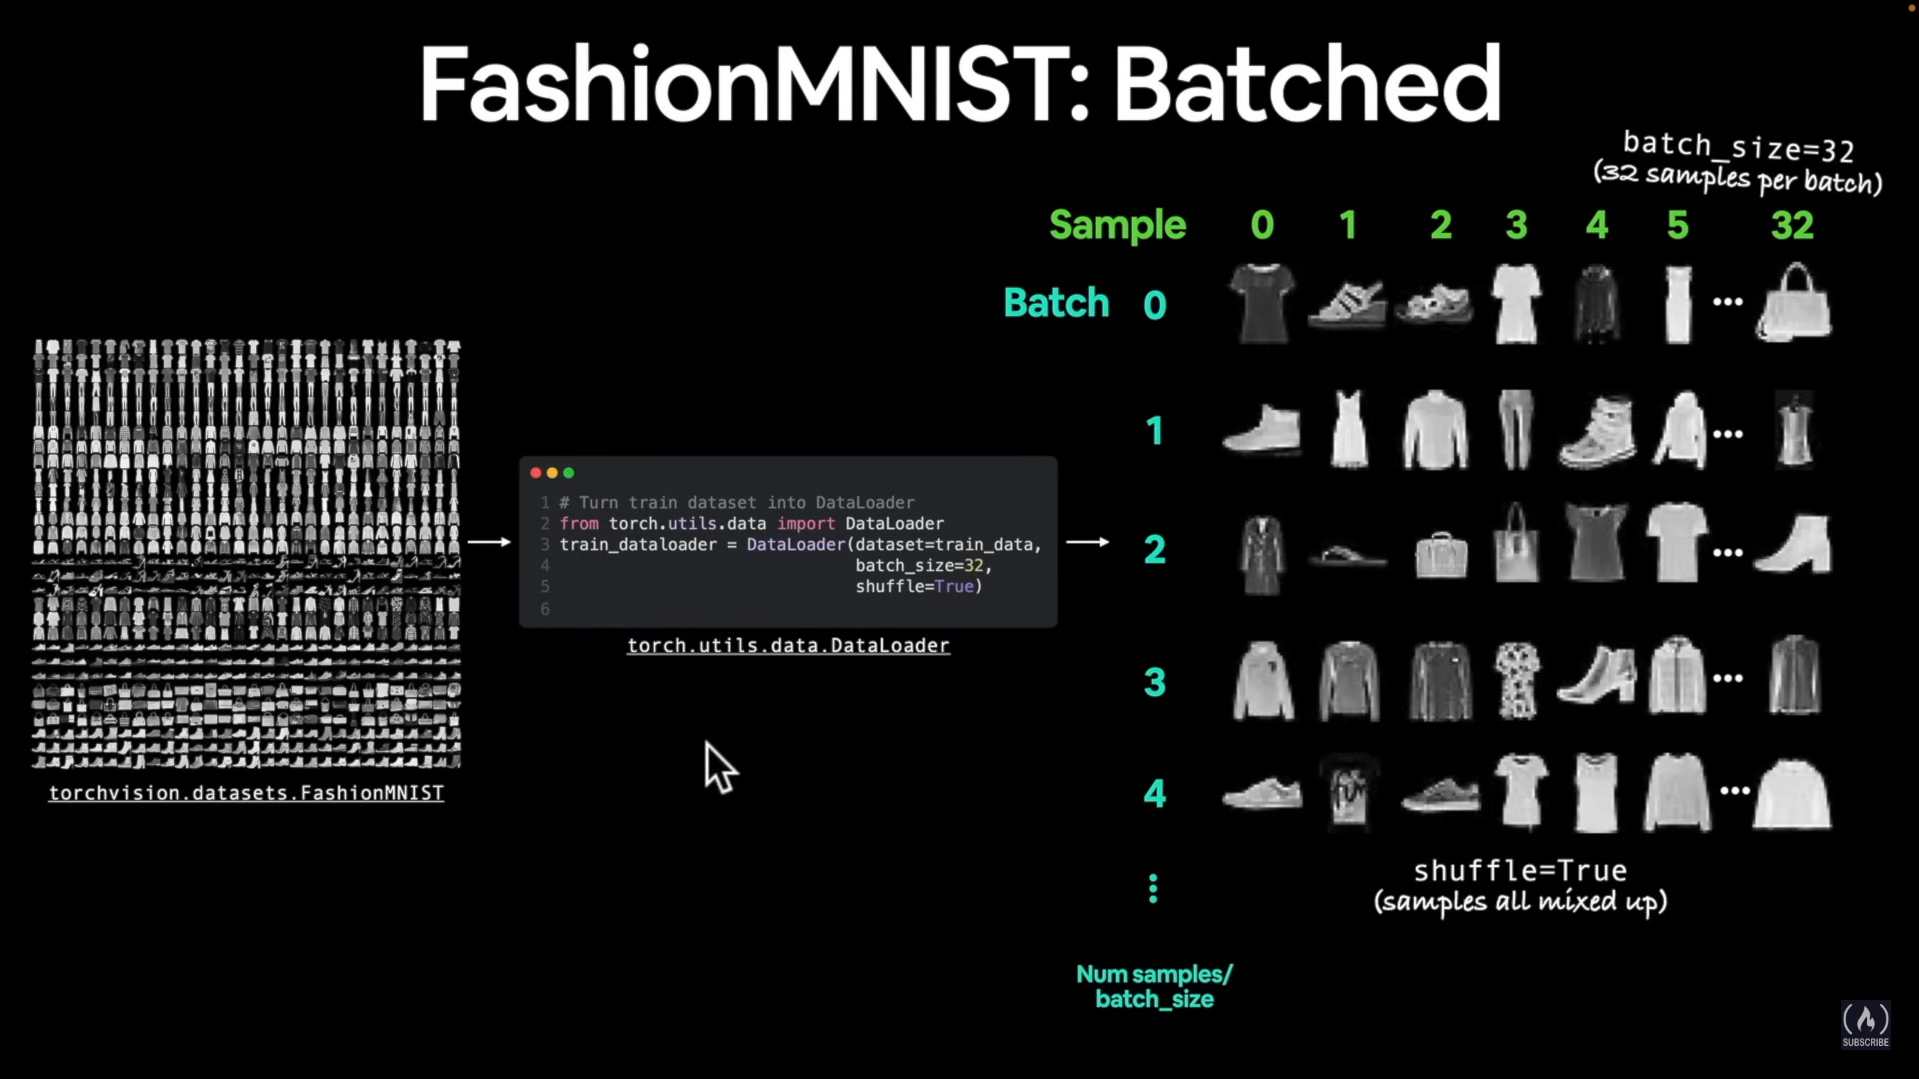

In [11]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

# CONVERT DATASET INTO ITERABLE (BATCHES)
# shuffle = True , so maybe if theres a whole line filled with same type of cloth
# also so that model doesnt learn in order
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size = BATCH_SIZE,
                              shuffle= False)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c5d6b45eb70>,
 <torch.utils.data.dataloader.DataLoader at 0x7c5d6aeb5400>)

In [13]:
# Lets check out what we have created
print(f"DataLoaders: {train_dataloader , test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} images")
print(f"length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} images")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c5d6b45eb70>, <torch.utils.data.dataloader.DataLoader object at 0x7c5d6aeb5400>)
length of train_dataloader: 1875 batches of 32 images
length of test_dataloader: 313 batches of 32 images


In [14]:
# check out whats inside the training dataloader
# turn into iterable with iter , and next for next batch
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: (6, 'Shirt') , label size : torch.Size([])


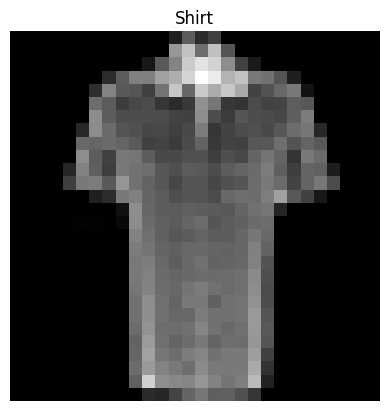

In [15]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0 , len(train_features_batch) , size = [1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze() , cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f"Label: {label.item() , class_names[label]} , label size : {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments , its best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words : Start simply and add complexity when necessary

### Create a flatten layer

`nn.Flatten` refers to a layer that reshapes the input tensor by flattening all dimensions except the batch dimension. This operation is crucial when transitioning from convolutional or pooling layers, which output multi-dimensional feature maps, to fully connected (linear) layers, which expect a one-dimensional input for each sample in the batch.

In [16]:
# take a look at x's shape
x = train_features_batch[0]
x , x.shape

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
           0.0000, 0.0039, 0.0078, 0.0000, 

In [17]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) #forward pass

# print out what happened
print(f"Shape before flattening : {x.shape} -> [color_channels , height , width]")
print(f"Shape after flattening : {output.shape} -> [color_channels , height*width]")

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels , height , width]
Shape after flattening : torch.Size([1, 784]) -> [color_channels , height*width]


In [18]:
# now take a look at x and its shape after flattening layer
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

- **Its all a one big tensor now**

In [19]:
# if we squeeze it , we can get rid of extra dimension
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

- We are trying to condense information down into a single vector space

- Why might we do this?
  - Its because we are going to build a baseline model and we are going to use a linear layer as the baseline model
  and linear layer cant handle multi dimensional data like this

  we want it to have a single vector as input

In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape :int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape ,
                 out_features = hidden_units) ,
        nn.Linear(in_features=hidden_units ,
                  out_features = output_shape)

    )
  def forward(self,x):
    return self.layer_stack(x)

In [21]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_names) #one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

- We get an output of 10 logits , thats exactly what we want as we put output_shape to len(class_names) which is 10

- We have one logit value per class that we have

- We want to compress our image into a singular vector and pass it in

- If we got rid of flatten layer we wont get a combined vector

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

- The weights and biases are ofcourse initialized with random values , but the whole premise of deep learning / machine learning is to pass data through our model and use our optimizer to update these random values to better represent the features in our data

- Featuring data could be almost anything , eg : feature of a bag can be that its got a rounded handle at the top , or it has an edge

- We aren't going to tell our model what features to learn about the data

- The premise of machine learning is that it figures out what features to learn

- And that is what the weight and bias matrices or tensors will represent : different features and there could be many because we have 60,000 images of 10 classes

### 3.1 Setup loss , optimizer and evaluation metrics

- Loss function : Since we are working with multi-class data , our loss function will be `nn.CrossEntropyLoss()`

- Optimizer : Our optimizer `torch.optim.SGD()`

- Evaluation metric - Since we're working on a classification problem , let's use accuracy as our evaluation metric

In [24]:
# bring helper functions from learn PyTorch repo
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists , skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

- helper_function.py has accuracy function so we will use that OR we can use torchmetrics like always

In [25]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters() , lr = 0.1)

In [26]:
loss_fn , optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 3.2 Creating a function to time our experiments

- Machine Learning is very experimental

- Two of the main things you'll often want to track are:
 - Model's performance ( loss and accuracy values etc. )
 - How fast it runs

`default_timer` : just says -> this is the exact time that our code started and then we are going to create another stop for when our code stopped

In [27]:
# Lets see how fast our model runs?
from timeit import default_timer as timer
def print_train_time(start : float,
                     end : float,
                     device : torch.device = None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time

In [28]:
# eg:
start_time = timer()
# code...
end_time = timer()
print_train_time(start = start_time , end = end_time , device = "cpu")

Train time on cpu : 0.000 seconds


4.079600000750361e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches , perform training steps , calculate the train loss *per batch*
3. Loop through testing batches , perform testing steps , calculate the test loss *per batch*
4. Print out what's happening
5. Time it all (for fun)

- Import **tqdm** for progress bar

- `tqdm` is a Python library used to display smart progress bars for loops and iterables. It provides a visual indication of progress during time-consuming operations

- Google Colab has tqdm built-in

- We're going to import from tqdm.auto , So there's a few different types of tqdm progress bars , auto is just going to recognize what computer environment we're using , and it's going to give us the best type of progress bar for what we're doing

- For eg: Google Colab is running a Jupyter Notebook behind the scenes. So the progress bar for Jupyter Notebook is a little bit different to Python scripts

In [29]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n------")
  # training
  train_loss = 0
  # Add a loop to loop through the training batches
  # loop through each batch of data
  for batch , (X,y) in enumerate(train_dataloader):
    # for every batch
    model_0.train()

    # forward pass
    y_pred = model_0(X)
    # calculate the loss (per batch)
    loss = loss_fn(y_pred , y)
    train_loss += loss # accumulate train loss

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

  # adjust training loss to get average training loss per batch per epoch
  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  # testing
  test_loss , test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    # We dont need to keep track of batches here again in the test data loader
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred , y_test)
      test_acc += accuracy_fn(y_true = y_test , y_pred = test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # print out whats happening
  print(f"\n Train Loss : {train_loss:.4f} | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0_on_cpu = print_train_time(start = train_time_start_on_cpu,
                                                   end = train_time_end_on_cpu,
                                                   device = str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train Loss : 0.5904 | Test Loss : 0.5095 | Test Acc : 82.0387
Epoch : 1
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train Loss : 0.4763 | Test Loss : 0.4799 | Test Acc : 83.1969
Epoch : 2
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 Train Loss : 0.4550 | Test Loss : 0.4766 | Test Acc : 83.4265
Train time on cpu : 31.650 seconds


- We have accumulated the train loss here for every batch in the train dataloader : `train_loss += loss`

- But we want to average it out across how many batches there are in the train data

- `train_loss += loss` : this value will be quite high until we readjust it to find the average loss per epoch because we are in the epoch loop

- This is one of the advantages of using mini batches , not only is it more memory efficient because we're not loading 60,000 images into memory at a time.

- We are updating our model's parameters once per batch rather than waiting for it to see the whole dataset.

- with every batch.

In [30]:
model_0.parameters()

<generator object Module.parameters at 0x7c5d68366340>

- `model_0.parameters()` gives you an iterator over all the parameters of your model.

- `next(...)` just grabs the first item from that iterator.

In [31]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True)

In [32]:
next(model_0.parameters()).device

device(type='cpu')

In [33]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get model_0 results

- We will write a function for this so we can use it later

In [34]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader ,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device = device):
  """ Returns a dictionary containing the results of model predicting on data_loader. """
  loss , acc = 0,0
  model.eval()
  with torch.inference_mode():
    # Move model to target device
    model.to(device)
    for X,y in tqdm(data_loader):
      # make data device agnostic
      X,y = X.to(device) , y.to(device)
      y_pred = model(X)

      # Accumulate the loss and acc values PER BATCH
      loss += loss_fn(y_pred , y)
      acc += accuracy_fn(y_true = y , y_pred = y_pred.argmax(dim = 1))

    # Scale loss and acc to find AVERAGE loss/acc PER BATCH
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name" : model.__class__.__name__ ,
          "model_loss" : loss.item() ,
          "model_acc" : acc} # works only when model was created with a class

model_0_results = eval_model(model=model_0,
                             data_loader = test_dataloader ,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device="cpu") # Ensure model_0 is evaluated on CPU
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 6. Model 1: Building a better model with non-linearity

- create a model with non-linear and linear layers

In [36]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten() , # flatten inputs into a single vector
        nn.Linear(in_features = input_shape , out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units , out_features = output_shape),
        nn.ReLU()
    )

  def forward(self , x:torch.Tensor):
    return self.layer_stack(x)



In [37]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784 , #o/p of flatten after 28x28 image goes in
                              hidden_units = 10 ,
                              output_shape = len(class_names)
                              ).to(device)

In [38]:
str(next(model_1.parameters()).device)

'cuda:0'

In [39]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

### 6.1 Setup loss , optimizer and evaluation metrics


In [40]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measures how wrong our model's pred is
optimizer = torch.optim.SGD(params = model_1.parameters() , lr = 0.01) # tries to update params and reduce loss

### 6.2 Functionizing training and evaluation / testing loops

- Let's create a function for :
  - training loop - `train_step()`
  - testing loop - `test_step()`

In [41]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer ,
               accuracy_fn ,
               device: torch.device = device
               ):
  """ Performs a training with model trying to learn on data_loader """
  train_loss , train_acc = 0,0
  model.train()
  for batch , (X,y) in enumerate(data_loader):
    X,y = X.to(device) , y.to(device)
    # forward pass (o/ps the raw logits)
    y_pred = model(X)
    # loss and accuracy per batch
    loss = loss_fn(y_pred , y)
    # accumulate train loss and acc
    train_loss += loss.item()
    train_acc += accuracy_fn(y_true = y , y_pred = y_pred.argmax(dim=1)) # logits -> pred labels
    # optimizer zero grad
    optimizer.zero_grad()
    # loss backwards
    loss.backward()
    # optimizer step
    optimizer.step()

  # divide total train loss and accuracy by length of train dataloader
  # to find out avg loss and accuracy per batch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss : {train_loss:.5f} | Train_acc : {train_acc:.2f} %")

In [42]:
def test_step(model: torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device
              ):
  """ Performs testing on a model going over data loader """
  test_loss , test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X , y in data_loader:
      X , y = X.to(device) , y.to(device)
      test_pred = model(X)
      # accumulate test loss / acc per batch
      test_loss += loss_fn(test_pred , y).item()
      test_acc += accuracy_fn(y_true = y , y_pred = test_pred.argmax(dim=1))

    # adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss : {test_loss:.5f} | Test_acc : {test_acc:.2f} % \n")

In [43]:
torch.manual_seed(42)
epochs = 3

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n--------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device
             )
  test_step(model = model_1,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device = device
             )

train_time_end_on_gpu = timer()
total_train_time_model_1_on_gpu = print_train_time(start = train_time_start_on_gpu,
                                                   end = train_time_end_on_gpu ,
                                                   device = device )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
--------
Train loss : 1.42179 | Train_acc : 54.29 %
Test loss : 1.12167 | Test_acc : 62.15 % 

Epoch : 1 
--------
Train loss : 1.03359 | Train_acc : 64.61 %
Test loss : 1.00019 | Test_acc : 64.48 % 

Epoch : 2 
--------
Train loss : 0.95996 | Train_acc : 66.05 %
Test loss : 0.96338 | Test_acc : 65.41 % 

Train time on cuda : 31.046 seconds


In [44]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

- Looks like we did not beat the predictions of model 0

In [45]:
total_train_time_model_0_on_cpu

31.650362669000003

> **Note** : Sometimes , depending on your data/hardware you might find that your model trains faster on CPU than GPU
>
> Why is this?
> 1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

### Get model_1 results dictionary

In [46]:

model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device) # Ensure model_1 is evaluated on the appropriate device

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.963383674621582,
 'model_acc': 65.40535143769968}

In [47]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also knows as ConvNets.

CNN's are known for their capabilities to find patterns in visual data

- Here , we will replicate CNN Explainer's default tinyVGG model

- Top 5 CNN Architectures (GoogleNet,ResNet, DenseNet,AlexNet and VGGNet) to build your computer vision model

- Conv2d : Applies a 2D convolution over an input signal composed of several input planes.

In [48]:
# Create a CNN (tinyVGG)
class FashionMNISTModelV2(nn.Module):
  """
  Model Architecture that replicates the TinyVGG model from CNN Explainer website
  """
  def __init__(self,input_shape:int , hidden_units: int , output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape , out_channels=hidden_units ,
                  kernel_size = 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculate this as it can be confusing
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_layer_1:{x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_layer_2:{x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier:{x.shape}")
    return x

- Here , one conv block refers to :
  - `conv layer->relu->conv layer->relu->max pool layer`

> NOTE: ALWAYS REMEMBER : THE `NN.FLATTEN()` LAYER SHOULD FLATTEN THE OUTPUT OF THE `LAST CONVOLUTIONAL BLOCK` , WHICH HAS A SHAPE OF (BATCH_SIZE , HIDDEN_UNITS , HEIGHT , WIDTH) , INTO (BATCH_SIZE, HIDDEN_UNITS * HEIGHT * WIDTH)

- So , here also , the `flatten layer` will flatten the output of conv layer 2 (which is the last conv layer) , and if we check the output shape for conv layer 2 : which lets say is `7 , 7` so flatten layer will change that and pass it as input to `nn.linear` layer like : `hidden_units*7*7`

In [49]:
# input shape : no of color channels in our image
image.shape

torch.Size([1, 28, 28])

- image shape : [ color_channels , height , width ]
- so Color Channels is 1 here which we will pass as input shape
- It's because we have grayscale image but the CNN Explainer website' tinyVGG (That we are replicating ) has color channel : 3
- And as we want one value for each class as output , our output_shape will be `len(class_names)`

In [50]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape= 1,
                              hidden_units= 10,
                              output_shape=len(class_names)).to(device)

In [51]:
# We're going to try and optimize these random numbers to help us predict on our
# FashionMNIST dataset
# model_2.state_dict()

- Our model is comprised of random numbers and what we are trying to do is just like all of our other models is pass data in and adjust the random numbers within these layers to best represent or data

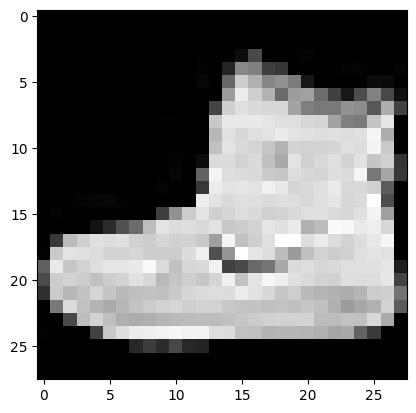

In [52]:
# Recall that we have image from the MNIST dataset
plt.imshow(image.squeeze() , cmap="gray");

In [53]:
image.shape

torch.Size([1, 28, 28])

Now we want to make sure that our model_2 works . Can our random image tensor go all the way through our model? That's what we find out

In [54]:
# Create a random tensor that is the same shape as our image
rand_image_tensor = torch.randn(size=(1, 1, 28, 28)) # Add batch size and channel dimension

# Assuming your model is already on the correct device (CPU or CUDA)
model_2.to(device) # Ensure model is on the correct device

# Pass the data through the model
output = model_2(rand_image_tensor.to(device))
print(f"Output shape of model_2: {output.shape}")

Output shape of model_2: torch.Size([1, 10])


So yes our model works!!

### 7.1 Stepping through `nn.Conv2d`

- So , lets see what happens when we pass random data through one of our Conv2d layers

In [55]:
# Creating dummy data
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image : \n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image : 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

**- This is not an actual image , just a bunch of random numbers**

- When you're just getting started and you're not sure what values to set these values ( stride , padding , kernel_size ) to , you just copy some existing values from somewhere and see if it works on your own problem

- And then if it doesnt , then you can adjust them

In [56]:
# Create a single Conv2d layer
# in_channels = no. of color channels
# out_channels (here) = no. of hidden units (for now)
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size =(3,3),
                       stride=1,
                       padding=0)


In [57]:
# Pass the data through conv layer
conv_output = conv_layer(test_image)
conv_output.shape

# if we used bigger kernel size eg: (5,5) our output will be smaller

torch.Size([10, 62, 62])

- So our test image (random numbers) have gone through the convolutional layer that we created , and have gone through this mathematical operation with all the values that we've set


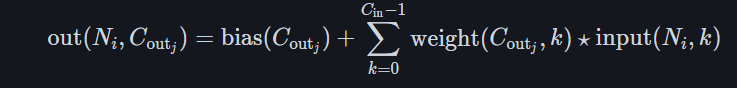

- This same process will happen if we use actual data as well

### 7.2 Stepping through `nn.MaxPool2d`

In [58]:
max_pool = nn.MaxPool2d(kernel_size = 2)

# original image shape
print(f"original image shape : {test_image.shape}")

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"test image through conv : {test_image_through_conv.shape}")

# pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool(test_image_through_conv)
print(f"test image through conv layer and max pool : {test_image_through_conv_and_max_pool.shape}")

original image shape : torch.Size([3, 64, 64])
test image through conv : torch.Size([10, 62, 62])
test image through conv layer and max pool : torch.Size([10, 31, 31])


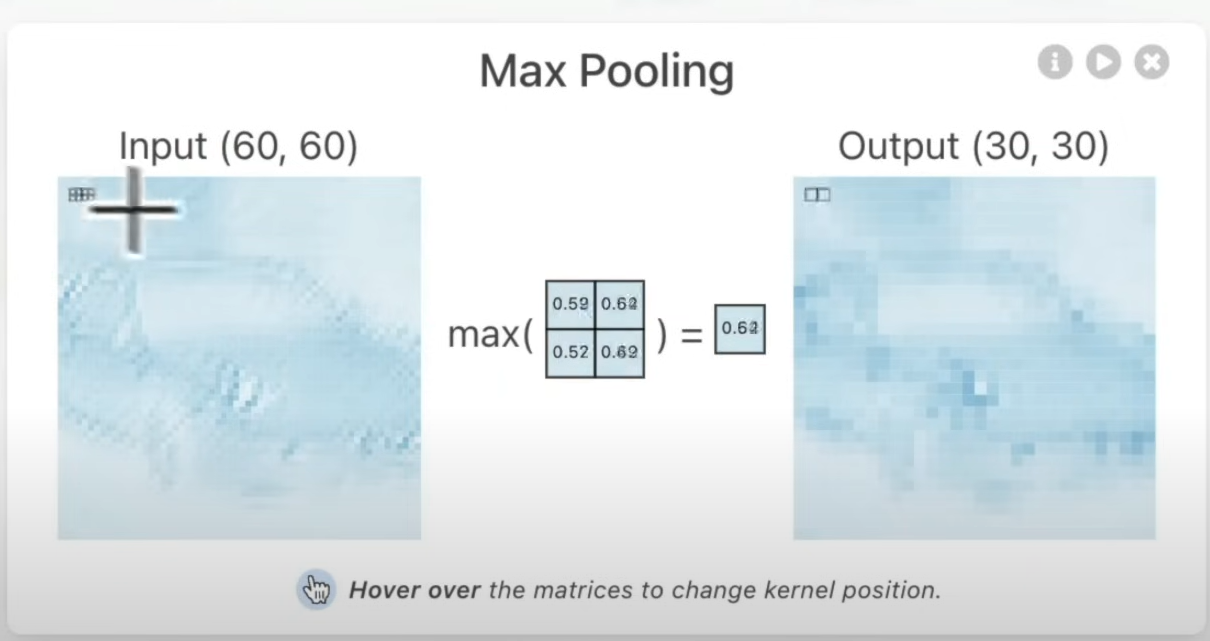

The max operation here is reducing it from a section of 4 numbers to one

Why would it do that?
A deep learning or a CNN takes some input data and figure out what features best represent whatever the input data is and compress them into a feature vector thats going to be our output

In [59]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimensions (4) to our images
random_tensor = torch.randn(size=(1,1,2,2))
# number of batches , color channel , height , widtj
random_tensor

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [60]:
# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Random tensor : \n {random_tensor} \n")
print(f"\n Random tensor's shape : \n {random_tensor.shape} \n")

print(f"\n Max pool tensor : \n {max_pool_tensor}")
print(f"\n Max pool tensor's shape : \n {max_pool_tensor.shape}")



 Random tensor : 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) 


 Random tensor's shape : 
 torch.Size([1, 1, 2, 2]) 


 Max pool tensor : 
 tensor([[[[0.3367]]]])

 Max pool tensor's shape : 
 torch.Size([1, 1, 1, 1])


- The max pool layer took the max value of random tensor , the shape is reduced from 2x2 into 1x1

> So the convolutional layer can compress the features into a smaller space . But the max pooling layer really compresses them. Thats the entire idea.

### 7.3 Setup a loss function, eval metrics and optimizer for `model_2`

- let's work on actual data now instead of random tensors

In [61]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)

In [62]:
loss_fn , optimizer , accuracy_fn

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ),
 <function helper_functions.accuracy_fn(y_true, y_pred)>)

### 7.4 Training and testing `model_2` using our training and testing functions

In [63]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train and test loop
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n------ ")
  train_step(model = model_2 ,
             data_loader = train_dataloader ,
             loss_fn = loss_fn ,
             optimizer = optimizer ,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model = model_2 ,
             data_loader = test_dataloader ,
             loss_fn = loss_fn ,
             accuracy_fn = accuracy_fn,
             device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                    end = train_time_end_model_2,
                                    device = device
                                    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------ 
Train loss : 1.03784 | Train_acc : 62.34 %
Test loss : 0.62543 | Test_acc : 76.93 % 

Epoch: 1 
------ 
Train loss : 0.54945 | Train_acc : 80.02 %
Test loss : 0.49835 | Test_acc : 81.55 % 

Epoch: 2 
------ 
Train loss : 0.45570 | Train_acc : 83.54 %
Test loss : 0.44131 | Test_acc : 84.17 % 

Train time on cuda : 40.785 seconds


### Get results of model_2

In [64]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.44130656123161316,
 'model_acc': 84.16533546325878}

## 8. Compare model results and training time

In [65]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])


## Performance-speed tradeoff

A performance-speed tradeoff (also known as a speed-accuracy tradeoff or SAT) describes the inverse relationship where increasing the speed of a task or process often leads to a decrease in its accuracy or quality, and vice versa

In [66]:
# adding another coloumn for time
compare_results["training_time"] = [total_train_time_model_0_on_cpu,
                                    total_train_time_model_1_on_gpu,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,31.650363
1,FashionMNISTModelV1,0.963384,65.405351,31.045916
2,FashionMNISTModelV2,0.441307,84.165335,40.784796


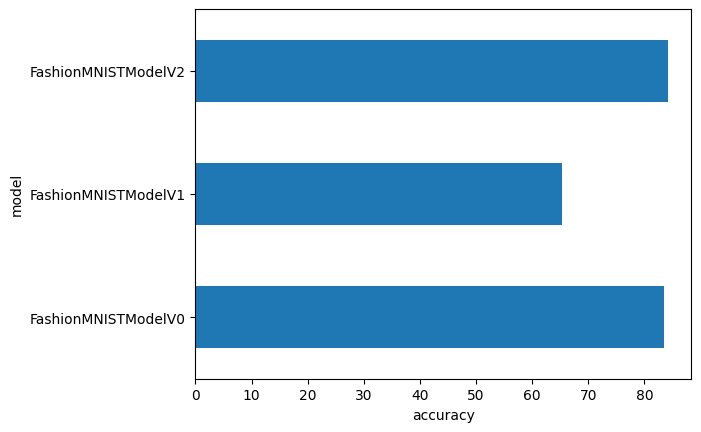

In [67]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model");

## 9. Predictions

Let's use our best performing model (model_2) to make predictions on random samples from the test data set

In [68]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device: torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample , dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # get prediction prob
      pred_prob = torch.softmax(pred_logit.squeeze() , dim=0)

      # get pred_prob OFF THE GPU bcs matplotlib uses cpu
      pred_probs.append(pred_prob.cpu()) # Move tensor to CPU before appending

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [69]:
img , label = test_data[0][:10]
img.shape , label

(torch.Size([1, 28, 28]), 9)

In [70]:
import random
# random.seed(42)
test_samples = []
test_labels = []
# k=9 for 9 random samples
for sample , label in random.sample(list(test_data) , k=9):
  test_samples.append(sample)
  test_labels.append(label)


Text(0.5, 1.0, 'Sandal')

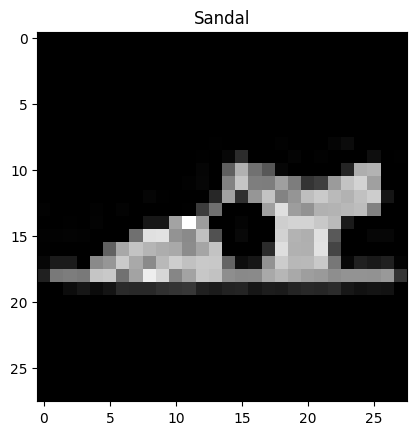

In [71]:
  # view first sample
  plt.imshow(test_samples[0].squeeze() , cmap="gray")
  plt.title(class_names[test_labels[0]])

- We have 9 random samples , nine labels that are associated with samples . Now let's make some predictions

- Randomly pick data samples from the test data and predict on them and do it over and over again to see what the model is doing

In [72]:
pred_probs = make_predictions(model=model_2,
                               data=test_samples )
# view first two prediction probabilities
pred_probs[:2]

tensor([[1.2382e-06, 9.9360e-07, 7.1813e-07, 6.7853e-06, 1.2412e-06, 9.9149e-01,
         1.7959e-06, 7.6240e-03, 8.1141e-04, 6.6306e-05],
        [6.0245e-03, 2.0516e-03, 2.8621e-01, 3.0339e-04, 9.8571e-02, 1.7026e-01,
         3.9748e-01, 3.6619e-06, 3.8497e-02, 5.9975e-04]])

- Now we need to convert these prediction probabilities into pred labels
- We can use argmax for that

In [73]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 7, 4, 0, 9, 3, 6])

In [74]:
test_labels

[5, 6, 8, 7, 2, 0, 9, 3, 6]

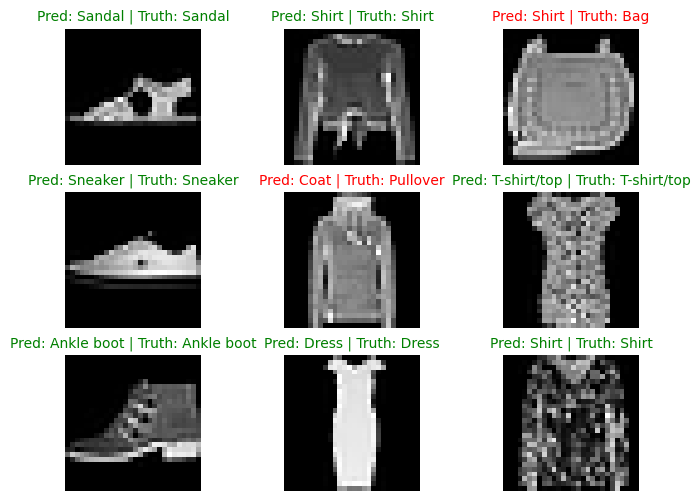

In [75]:
# Plot predictions
plt.figure(figsize=(8,6))
nrows = 3
ncols = 3

for i , sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows,ncols,i+1)

  # plot the target image
  plt.imshow(sample.squeeze() , cmap ="gray")

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth label and change color of text
  if pred_label == truth_label:
    plt.title(title_text , fontsize = 10 , c="g")
  else:
    plt.title(title_text , fontsize = 10 , c="r")

  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

- A confusion matrix is a very good way of evaluating your classification models visually

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torch.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [80]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader , desc="Make predictions..."): # Iterate over test_dataloader instead of test_data
    X,y = X.to(device) , y.to(device)
    y_logit = model_2(X)
    # We don't need to unsqueeze and squeeze here because the dataloader already provides batches
    y_pred = torch.softmax(y_logit , dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())


# Concatenate list of predictions into a tensor
# y_preds
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Make predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [85]:
# See if required packages are installed and if not , install them
try:
  import torchmetrics , mlxtend
  print(f"torchmetrics version : {torchmetrics.__version__}")
  print(f"mlxtend version : {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19 , "mlxtend version should be 19 or higher"
except:
  print("installing mlxtend and torchmetrics")
  !pip install torchmetrics -q
  !pip install mlxtend -q
  import torchmetrics , mlxtend
  print(f"torchmetrics version : {torchmetrics.__version__}")
  print(f"mlxtend version : {mlxtend.__version__}")

installing mlxtend and torchmetrics
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 20.8 MB/s eta 0:00:00
torchmetrics version : 1.8.1
mlxtend version : 0.23.4


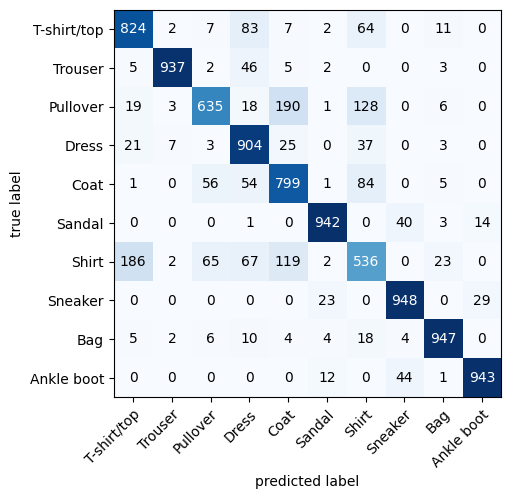

In [94]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 2. Set Up confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor , target = test_data.targets)

# 3. Plot the confusion matrix
fig , ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                 class_names = class_names,
                                 figsize=(5,7))
plt.show()

In [90]:
confmat_tensor

tensor([[824,   2,   7,  83,   7,   2,  64,   0,  11,   0],
        [  5, 937,   2,  46,   5,   2,   0,   0,   3,   0],
        [ 19,   3, 635,  18, 190,   1, 128,   0,   6,   0],
        [ 21,   7,   3, 904,  25,   0,  37,   0,   3,   0],
        [  1,   0,  56,  54, 799,   1,  84,   0,   5,   0],
        [  0,   0,   0,   1,   0, 942,   0,  40,   3,  14],
        [186,   2,  65,  67, 119,   2, 536,   0,  23,   0],
        [  0,   0,   0,   0,   0,  23,   0, 948,   0,  29],
        [  5,   2,   6,  10,   4,   4,  18,   4, 947,   0],
        [  0,   0,   0,   0,   0,  12,   0,  44,   1, 943]])

> The ideal confusion matrix will have all of the diagonal rows darkened with all of the values and no values elsewhere. Because that means that the predicted label lines up with true label
>
> So , in our case we have definitely a very dark diagonal here . But let's dive into some of the highest numbers here. It looks like our model is predicting Tshirt when its actually a shirt and vice versa
>
> This is just a way to further evaluate your model

Note : Confusion Matric is one of the most powerful ways to visualize your classification model predictions

## 11. Save and load best performing model

In [96]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents =True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "5_PyTorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}" )
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/5_PyTorch_computer_vision_model_2.pth


In [97]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

# Load in the save state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [98]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.44130656123161316,
 'model_acc': 84.16533546325878}

In [99]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.44130656123161316,
 'model_acc': 84.16533546325878}

In [100]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)